# Fit a real kinetic

Let's fit a model coming from the physical chemistry field with real data.

## Select model

We select a heterogeneous catalysis solver:

In [1]:
import numpy as np
from scifit.solvers.specials import RaneyKetonDehydrogenationFitSolver

We will model the dehydrogenation of a keton using a Raney's Nickel:

$$\mathrm{A \underset{Ni}{\overset{k_1}{\longrightarrow}} B + C}$$

Model is based on Langmuir isotherm:

$$r = k_1 \theta_A = k_1\frac{aA}{1 + aA + bB + cC}$$

With *ad hoc* simplification of a clever experimental setup:

$$r = \frac{1}{V}\frac{\mathrm{d}\xi}{\mathrm{d}t} \simeq k_1\frac{aA}{aA + bB} = k\frac{a(n_0 - \xi)}{a(n_0 - \xi) + b\xi}$$

Integrating both parts:

$$\int\limits_0^\xi\left(1 + \frac{b\xi}{a(n_0-\xi)}\right)\mathrm{d}\xi = \int\limits_0^t k_1V\mathrm{d}t$$

We finally get an easy fittable relationship between time and reaction coordinate:

$$\left(1 - \frac{b}{a}\right)\xi - n_0\frac{b}{a}\ln\left|\frac{n_0 - \xi}{n_0}\right| = k_1Vt$$

Now create a new solver with two physical known parameters:

In [2]:
V = 190e-6            # m3 of isopropanol
rho = 785             # kg/m³
M = 60.1              # g/mol
n0 = 1000*rho*V/M     # mol

In [3]:
solver = RaneyKetonDehydrogenationFitSolver(n0=n0, V=V)

## Load data

We load real dataset:

In [4]:
data = solver.load("data/RaneyKetonDehydrogenation.csv")

## Solve Fit

Everything is setup, we can solve our problem:

In [5]:
solution = solver.fit(data, p0=[1e-2, 1e2])

In [6]:
solver.solved()

True

In [7]:
print(solution["message"])

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


In [8]:
print(solution["parameters"])

[6.20187381e-02 1.14150963e+02]


In [9]:
print(np.diag(solution["covariance"]))

[1.06211964e-07 1.77726158e+00]


As we can see, parameters have been properly regressed.

## Render solution

Finally we can render fit and loss function to check the dynamic:

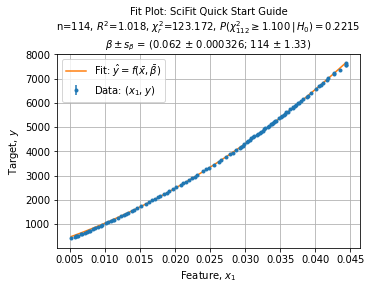

In [10]:
axe = solver.plot_fit(title="SciFit Quick Start Guide")

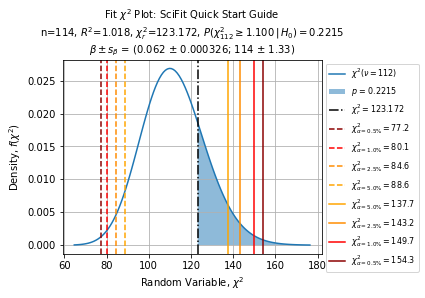

In [11]:
axe = solver.plot_chi_square(title="SciFit Quick Start Guide")

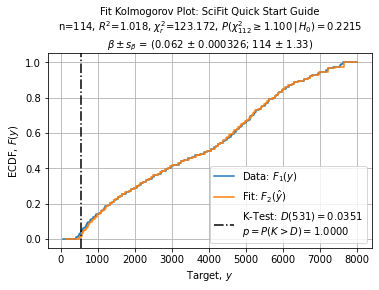

In [12]:
axe = solver.plot_kolmogorov(title="SciFit Quick Start Guide")

In [13]:
solver.parameter_domains()

,0,1
min,0.031009,57.075482
max,0.093028,171.226445


In [14]:
solver.parameter_domains()

,0,1
min,0.031009,57.075482
max,0.093028,171.226445


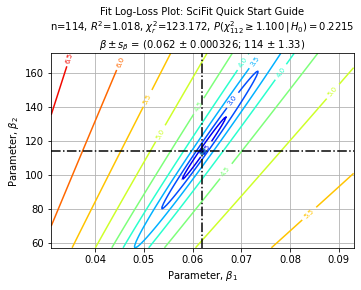

In [15]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=200,
    log_loss=True
)

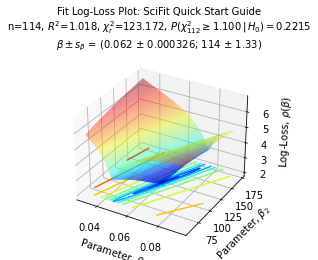

In [16]:
axe = solver.plot_loss(
    title="SciFit Quick Start Guide", resolution=200,
    surface=True, log_loss=True
)